# **Google Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


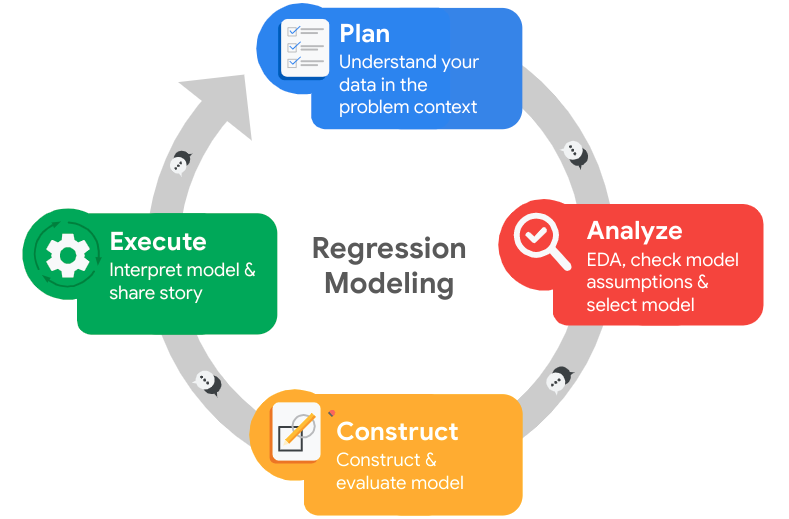

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
f1_score, roc_auc_score, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import pickle

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(inplace=True, 
           columns={"Work_accident": "work_accident", 
                    "Department": "department",
                    "average_montly_hours": "average_monthly_hours",
                    "time_spend_company": "tenure"})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


np.int64(3008)

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

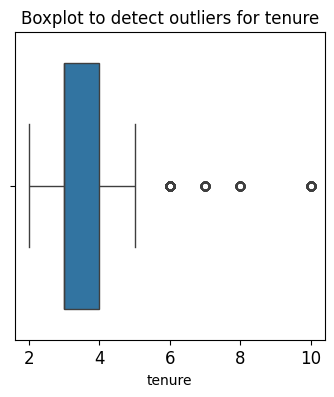

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(4,4))
sns.boxplot(x=df1["tenure"])
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [12]:
# Determine the number of rows containing outliers

percentile25 = df1.tenure.quantile(0.25)

percentile75 = df1.tenure.quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75  + 1.5 * iqr
lower_limit = percentile25  - 1.5 * iqr

outliers = df1[(df1["tenure"] < lower_limit) | (df1["tenure"] > upper_limit)]

print(f'Lower limit: {lower_limit}' +
      f'\nupper limit: {upper_limit}'+
      f'\nNumber of rows containing outliers in `tenure`: {len(outliers)}')

Lower limit: 1.5
upper limit: 5.5
Number of rows containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1.left.value_counts())

# Get percentages of people who left vs. stayed
print('\n', df1.left.value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64

 left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

As a starting point, we will examine the relationship between `salary` and `tenure`.

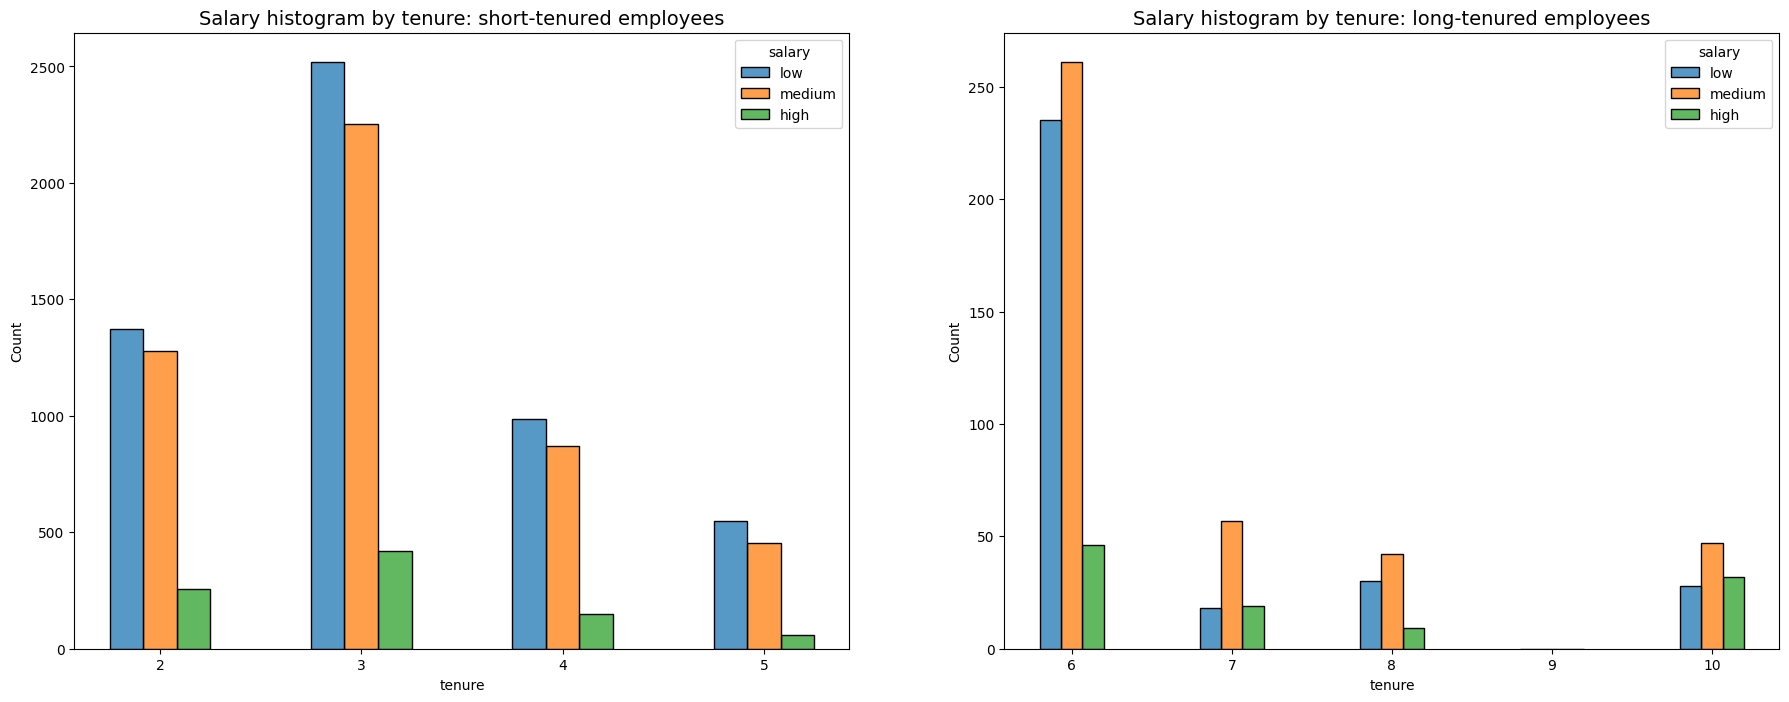

In [14]:

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1["tenure"] <= 5]

# Define long-tenured employees
tenure_long = df1[df1["tenure"] > 5]

sns.histplot(data=tenure_short, x="tenure", hue="salary", discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured employees', fontsize='14')
unique_tenures = sorted(tenure_short['tenure'].unique())  
ax[0].set_xticks(unique_tenures)

sns.histplot(data=tenure_long, x="tenure", hue="salary", discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured employees', fontsize='14')
plt.show()

The visualizations above show no significant concentration of high earners among long-tenured employees, suggesting that `salary` is unlikely to be a primary factor influencing employee retention.

Next, we will examine the percentage of different `salary` groups among employees who stayed and left.

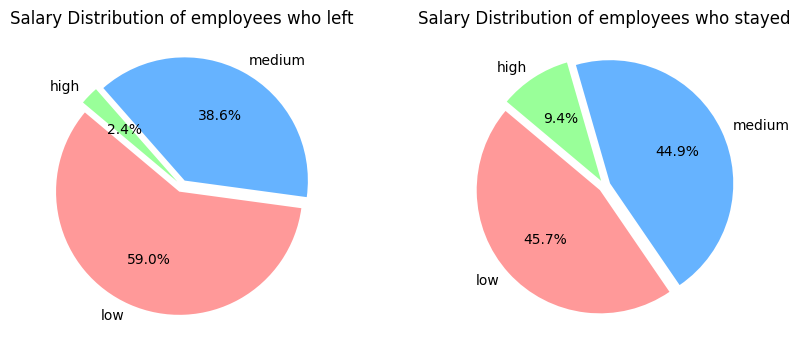

In [15]:
colors = ['#ff9999','#66b3ff','#99ff99']

explode = (0.05, 0.05, 0.05)

left_salary = df1[df1["left"] == 1]["salary"].value_counts()

stay_salary = df1[df1["left"] == 0]["salary"].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].pie(left_salary, labels=left_salary.index, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=140)
ax[0].set_title("Salary Distribution of employees who left", fontsize=12)

ax[1].pie(stay_salary, labels=stay_salary.index, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=140)
ax[1].set_title("Salary Distribution of employees who stayed", fontsize=12)

plt.show()


Low paid employees make up nearly 60% of those who leave, compared to about 46% of those who stay, while high paid staff account for only 2.4% of leavers but 9.4% of stayers. In other words, lower salary workers are leaving at a much higher rate, and higher salary workers are being retained disproportionately.

However, we still cannot confirm that `salary` plays a major role in employees' decisions. Low-paid positions often involve frontline, support, or operational roles where turnover is naturally higher.

`number_project` and `average_monthly_hours` will be our next focus, as they can be viewed as indicators of employees' workload.

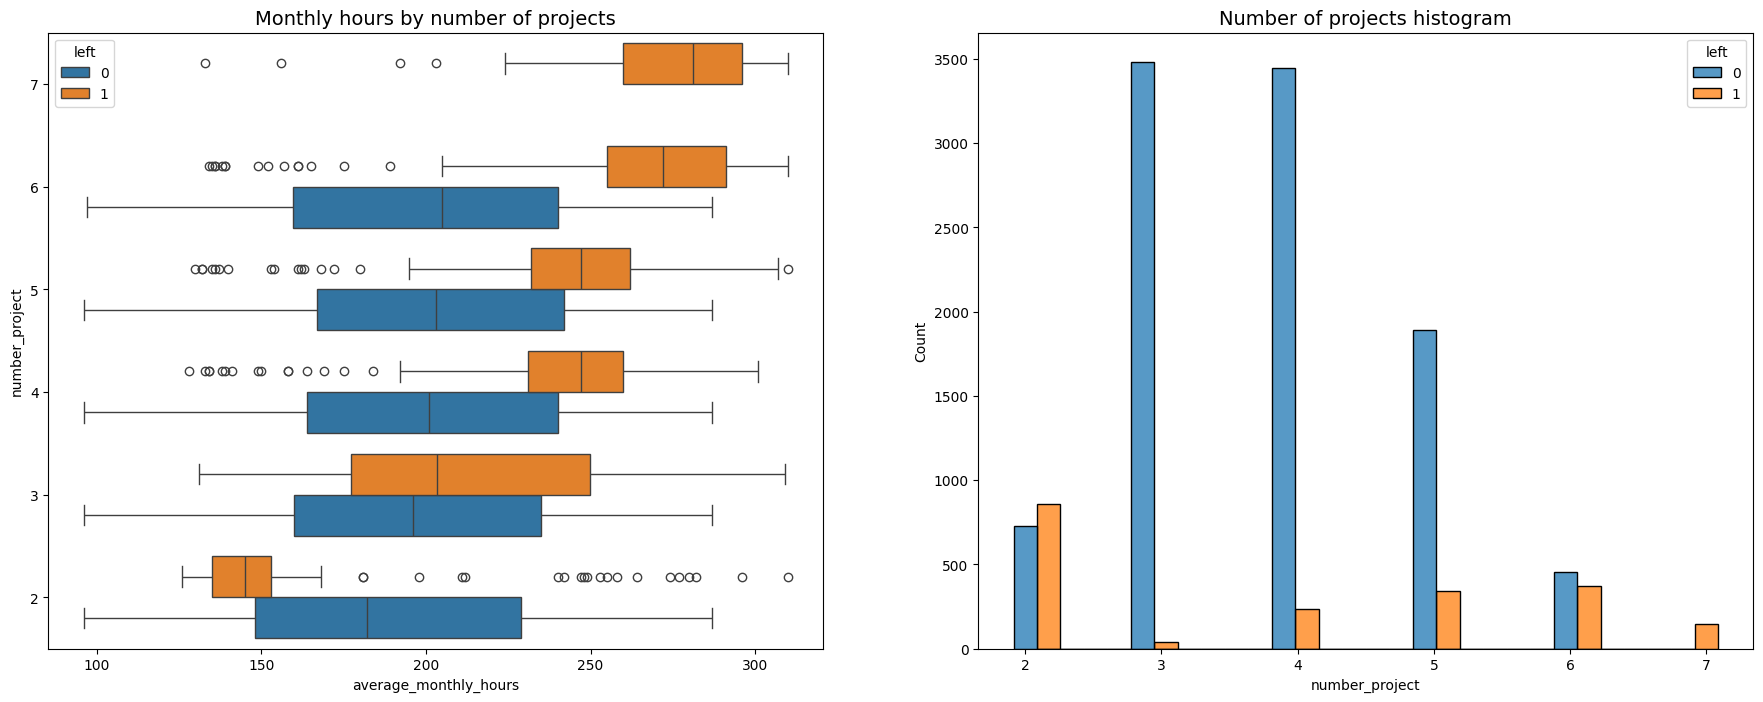

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x="average_monthly_hours", y="number_project", 
            hue="left", orient='h', ax=ax[0])

ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

tenure_stay = df1[df1['left']==0]["number_project"]
tenure_left = df1[df1['left']==1]["number_project"]

sns.histplot(data=df1, x="number_project", hue="left", 
             multiple='dodge', shrink=2, ax=ax[1])

ax[1].set_title('Number of projects histogram', fontsize='14')
plt.show()


It is expected that employees who work on more projects would also log more hours, and this trend is evident here. The average monthly hours increase with the number of projects for both employees who stay and those who leave. Still, several key patterns stand out:

1. Among those who **leave**, there appear to be two distinct groups:  
   - **Group A** includes employees who worked significantly fewer hours than their peers with the same number of projects. These individuals might have been laid off or had already resigned and were given lighter workloads.  
   - **Group B** includes those who worked much longer hours than their peers. These employees likely quit due to being overworked and may have been key contributors to their projects.

2. **All employees who worked on 7 projects left the company**. Those with 6 or 7 projects had extremely high monthly working hours, with an interquartile range of approximately 255 to 295 hours, much higher than any other group.

3. **Employees handling 3 to 4 projects had the lowest turnover rate**. This suggests that this range of workload may be optimal.

4. Assuming a 40-hour workweek and two weeks of annual leave, the standard average monthly working hours would be about 167. Most employees, whether they stayed or left, worked well above this number, except those with only 2 projects. This suggests that many employees were overworked.


In [17]:
# Show the number of employees who stayed or left among those who worked on 7 projects.
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

It is confirmed that every employee who worked on 7 projects eventually left the company.

As `average_monthly_hours` appears to be an important factor, its relationship with other factors will be further investigated.

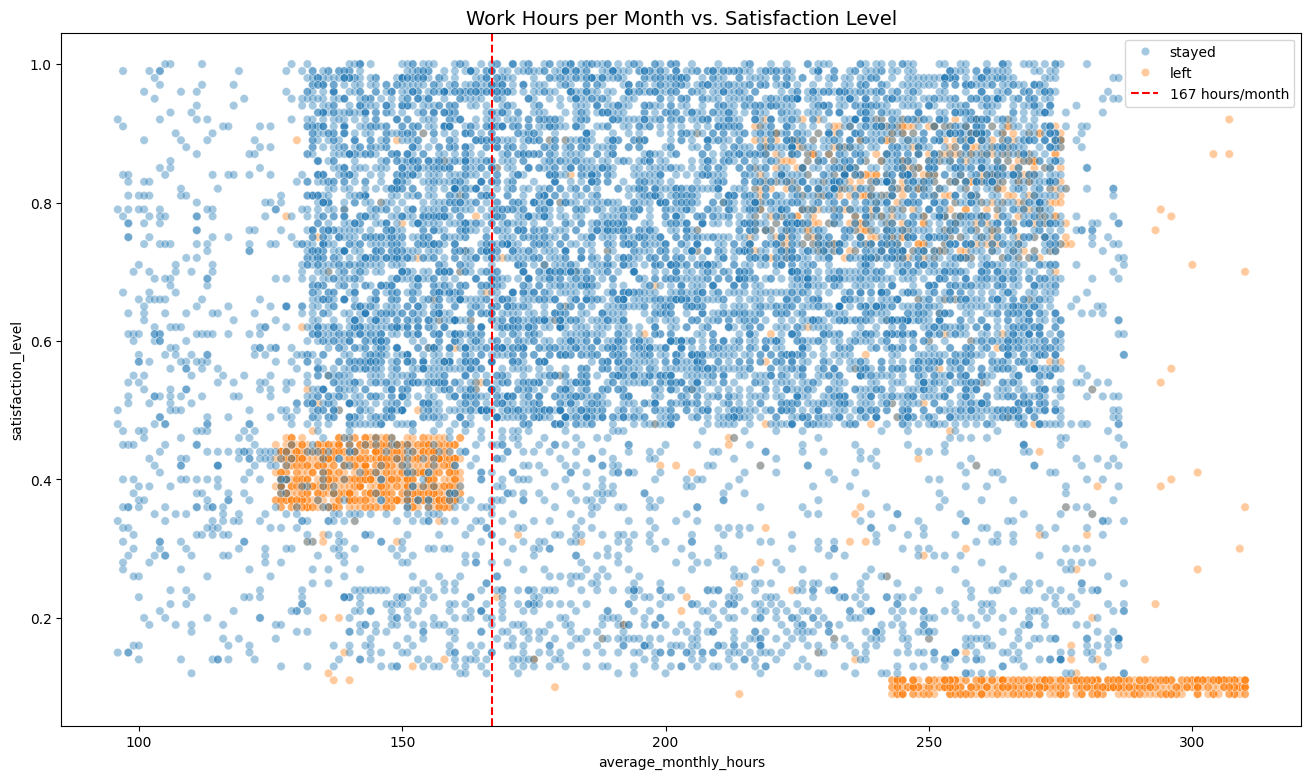

In [18]:
plt.figure(figsize=(16, 9))

status_labels = df1['left'].map({0: 'stayed', 1: 'left'})

sns.scatterplot(x=df1['average_monthly_hours'],y=df1['satisfaction_level'],
    hue=status_labels,      hue_order=['stayed', 'left'], alpha=0.4)

plt.axvline(x=167, color='red', linestyle='--', label='167 hours/month')
plt.legend()
plt.title('Work Hours per Month vs. Satisfaction Level', fontsize=14)
plt.show()


The scatterplot shows three distinct groups. 

1. Group working around 210–280 hours per month, with satisfaction levels between 0.7 and 0.9.

2. Group with typical less working hours, but with satisfaction levels around 0.4. It’s difficult to determine why they *left*. One possible reason is the pressure to work longer hours, given that many of their peers worked significantly more. This pressure may have contributed to their lower satisfaction.

3. Large Group who worked approximately 240–315 hours per month. Working 315 hours a month translates to over 75 hours a week throughout the year, which likely explains their near zero satisfaction levels.

*Note: The odd patterns in the distributions suggest that the data may have been manipulated or artificially generated.*

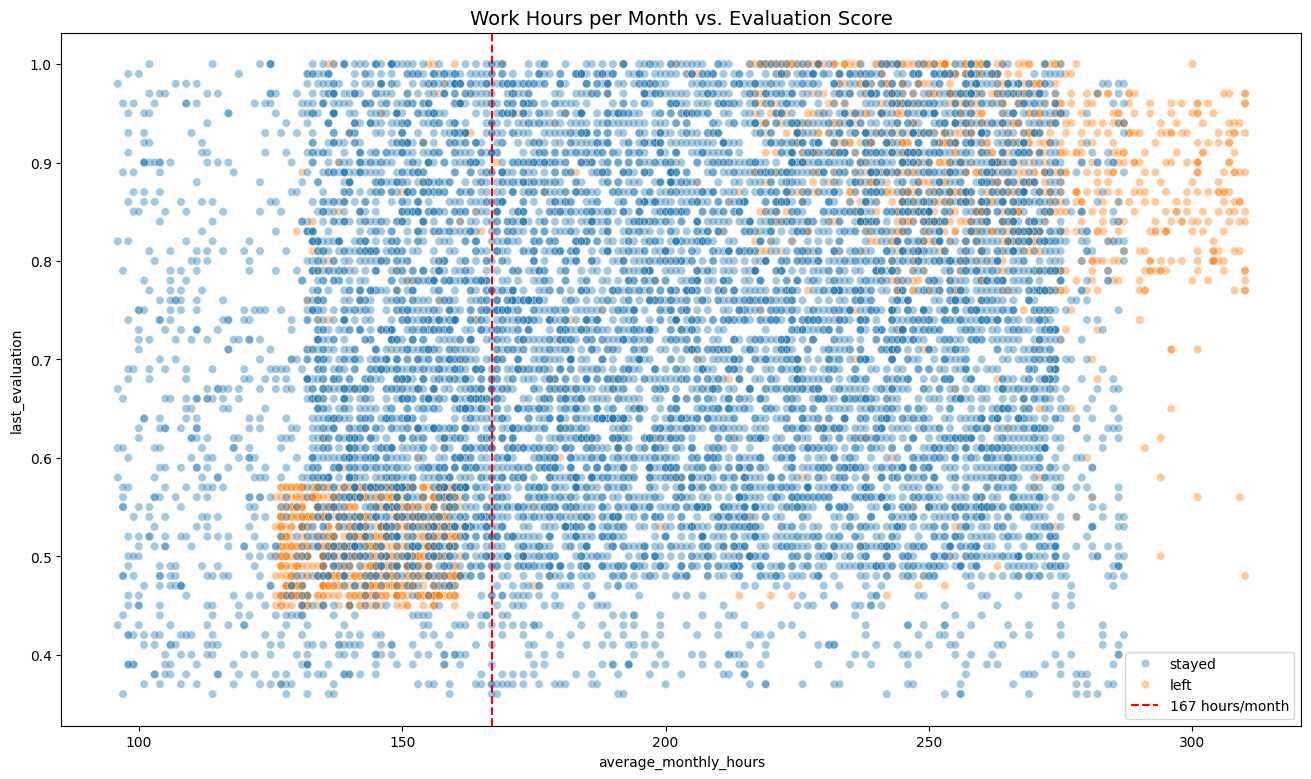

In [19]:
plt.figure(figsize=(16, 9))

status_labels = df1['left'].map({0: 'stayed', 1: 'left'})

sns.scatterplot(x=df1["average_monthly_hours"], y=df1["last_evaluation"], hue=status_labels,      
                hue_order=['stayed', 'left'], alpha=0.4)

plt.axvline(x=167, color='red', linestyle='--', label='167 hours/month')
plt.legend()
plt.title('Work Hours per Month vs. Evaluation Score', fontsize=14)
plt.show()


The scatterplot reveals a few key points:
- Most employees at this company work well over the average 167 hours per month.
- There seems to be a relationship between hours worked and evaluation scores.
- However, working long hours doesn’t always lead to high evaluation scores, as shown by the number of employees in the lower right quadrant.
- Two groups of employees who left stand out: those who were overworked but performed well, and those who worked slightly below average hours with lower evaluation scores.


Next, we could look into whether employees who worked very long hours received promotions in the last five years.

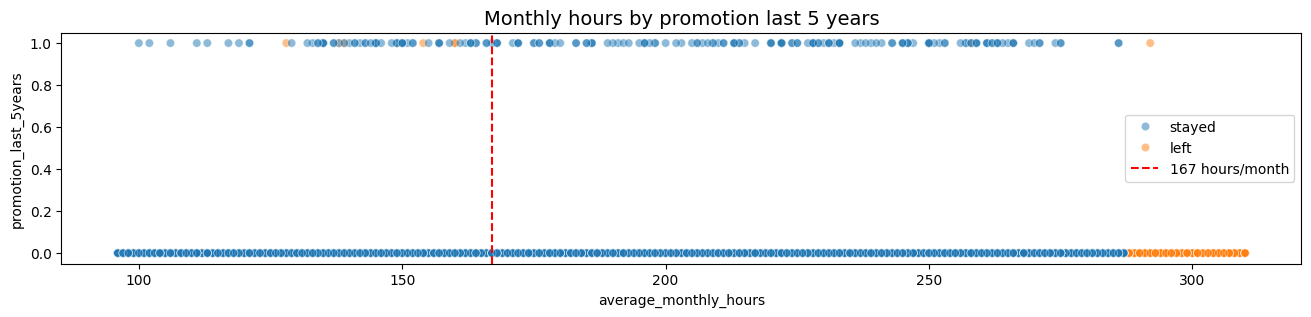

In [20]:
plt.figure(figsize=(16, 3))

sns.scatterplot(data=df1, x="average_monthly_hours", y="promotion_last_5years", hue=status_labels,      
                hue_order=['stayed', 'left'], alpha=0.5)

plt.axvline(x=167, color='red', ls='--', label='167 hours/month')
plt.legend()
plt.title('Monthly hours by promotion last 5 years', fontsize='14')
plt.show()

The plot above highlights a few key points:
- Most employees who left had some of the longest working hours.
- Among those who worked the most hours, very few were promoted.
- Very few employees promoted in the last five years ended up leaving.

Next, it may be helpful to examine how those who left are distributed across different departments.

In [21]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

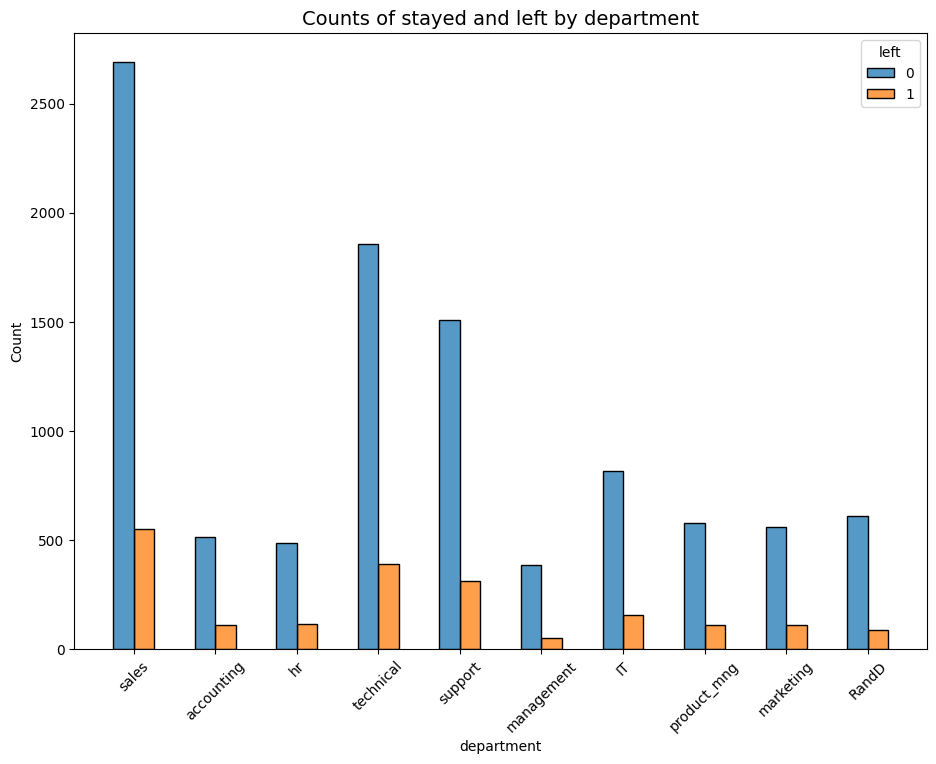

In [22]:
plt.figure(figsize=(11,8))

sns.histplot(data=df1, x="department", hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=0.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed and left by department', fontsize=14)
plt.show()

There doesn’t appear to be any department with a noticeably different ratio of employees who left compared to those who stayed.



Next, we could plot satisfaction levels against tenure.

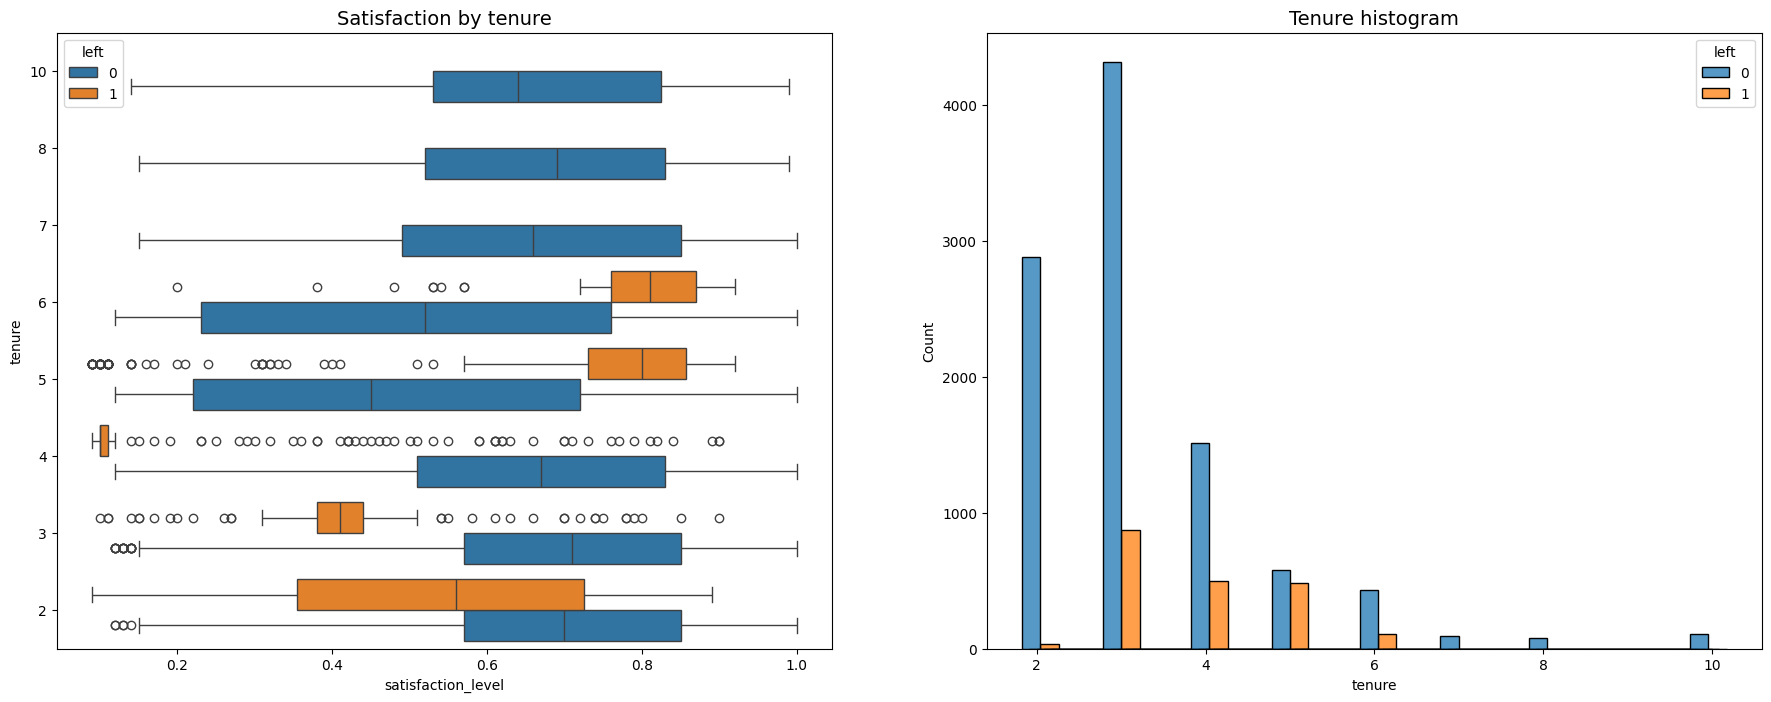

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x="satisfaction_level", y="tenure", hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

tenure_stay = df1[df1["left"]==0]["tenure"]
tenure_left = df1[df1["left"]==1]["tenure"]

sns.histplot(data=df1, x="tenure", hue="left", multiple='dodge', shrink=5, ax=ax[1])

ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

There are several insights can be drawn from this plot:
- The longest tenured employees did not leave, and their satisfaction levels are similar to those of newer employees who stayed.
- The histogram shows that there are relatively few employees with long tenures. These individuals may hold higher ranking or better paid positions.
- Among those who left, there are two main groups: dissatisfied employees with short tenures and highly satisfied employees with medium length tenures.
- Employees with around 4 years of tenure who left show unusually low satisfaction levels. It may be worth investigating whether any company policies changed around that time.

Lastly, we will explore whether there are any strong correlations between the variables in the dataset.

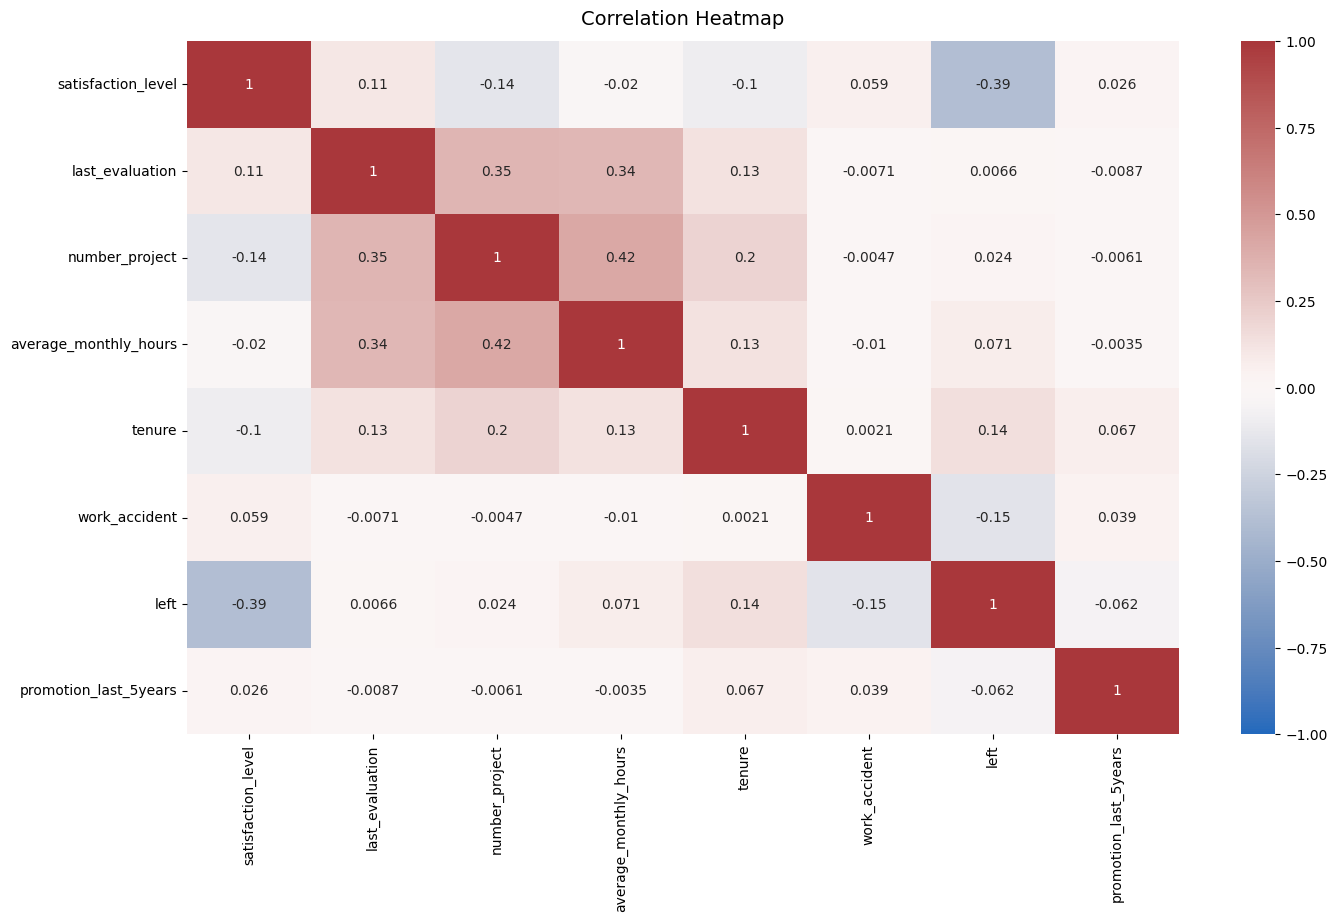

In [24]:
plt.figure(figsize=(16, 9))

heatmap = sns.heatmap(df0.select_dtypes(include=['number']).corr(), 
                      vmin=-1, vmax=1, annot=True, 
                      cmap=sns.color_palette("vlag", as_cmap=True))

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

The correlation heatmap shows that the number of projects, monthly hours, and evaluation scores are all positively correlated with each other. It also confirms that employee turnover is negatively correlated with satisfaction level.

### Insights

Employees who have been with the company for more than six years tend to stay. In contrast, those who are leaving often work long hours, manage many projects, and report low satisfaction levels. This suggests that poor management may be a key factor behind the turnover. It can be discouraging to put in so much effort without receiving promotions or strong evaluations. As a result, a sizeable group of employees likely feel burned out.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee will leave the company, which makes this a classification task. Since the outcome variable left has two possible values, 1 for employees who left and 0 for those who stayed, this is a binary classification problem.

### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could a Tree-based Machine Learning model.

### Modeling


Different tree-based models will be constructed for comparison.

In [25]:
# Encode the necessary columns for the models

df_cat = df0.copy()

df_cat["salary"] = df_cat["salary"].astype('category')

df_cat["salary"] = df_cat["salary"].cat.reorder_categories(['low', 'medium', 'high'], ordered=True).cat.codes

df_cat = pd.get_dummies(df_cat, columns=["department"], drop_first=False, prefix="department")

In [26]:
# Split the training and test data

y = df_cat["left"]

X = df_cat.drop("left", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Build a decision tree model and use cross-validated grid search to find the best set of parameters for it. This will help identify the most effective combination for accurate predictions.

In [27]:
dt = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[4, 6, 8, 10, None],
             'min_samples_leaf': [1, 3, 5, 7],
             'min_samples_split': [2, 4, 6, 8]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

dt_cv = GridSearchCV(
    dt,
    cv_params,
    scoring=scoring,
    cv=5,
    refit='roc_auc'
)

Fit the model.

In [28]:
# %%time
# dt_cv.fit(X_train, y_train)

In [29]:
# with open('models/initial_models/dt_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(dt_cv, to_write)

In [30]:
with open('models/initial_models/dt_cv_model.pickle', 'rb') as to_read:
    dt_cv = pickle.load(to_read)

In [31]:
dt_cv.best_params_

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [32]:
# define a helper function make_results for the ease of presenting the output

def make_results(model_name, model_object, metric):
    """
    Arguments:
        model_name (str): Name for this model in the output table
        model_object: A fitted GridSearchCV (or similar) object
        metric (str): One of 'precision', 'recall', 'f1', 'accuracy', or 'auc'
    
    Returns:
        A one-row DataFrame with columns [model, precision, recall, F1, accuracy, auc]
        for the estimator that has the highest mean “metric” in CV.
    """
    # Map our metric keywords to the cv_results_ column names
    metric_key = {
        'auc':      'mean_test_roc_auc',
        'precision':'mean_test_precision',
        'recall':   'mean_test_recall',
        'f1':       'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }
    # We want all five metrics in the output:
    output_cols = {
        'precision':'mean_test_precision',
        'recall':   'mean_test_recall',
        'F1':       'mean_test_f1',
        'accuracy': 'mean_test_accuracy',
        'auc':      'mean_test_roc_auc'
    }
    
    # Pull CV results into a DataFrame
    cv_df = pd.DataFrame(model_object.cv_results_)
    
    # Find the row index where the chosen metric is maximal
    best_idx = cv_df[metric_key[metric]].idxmax()
    best_row = cv_df.loc[best_idx]
    
    # Build a single‐row dict for our table
    data = {'model': [model_name]}
    for name, col in output_cols.items():
        data[name] = [best_row[col]]
    
    return pd.DataFrame(data)

In [33]:
dt_cv_results = make_results('Decision Tree CV', dt_cv, 'auc')
dt_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.957741,0.93839,0.947899,0.975464,0.984122


All of the scores from the decision tree model suggest it is performing well.

However, since decision trees can easily overfit the data, a random forest model might be a better option. It reduces overfitting by combining predictions from multiple trees.

 So a random forest model will be constructed next.

In [34]:
rf = RandomForestClassifier(random_state=42)

cv_params = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, None],
    'max_features': [1.0, 'sqrt'],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_cv = GridSearchCV(
    rf,
    cv_params,
    scoring=scoring,
    cv=5,
    refit='roc_auc'
)



Fit the model.

In [35]:
# %%time
# rf_cv.fit(X_train, y_train)

In [36]:
# with open('models/initial_models/rf_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(rf_cv, to_write)

In [37]:
with open('models/initial_models/rf_cv_model.pickle', 'rb') as to_read:
   rf_cv = pickle.load(to_read)

In [38]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [39]:
rf_cv_results = make_results('Random Forest CV', rf_cv, 'auc')
rf_cv_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest CV,0.993094,0.962286,0.977427,0.989421,0.994046


In [40]:
results = pd.concat([dt_cv_results, rf_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.957741,0.938390,0.947899,0.975464,0.984122
0,Random Forest CV,0.993094,0.962286,0.977427,0.989421,0.994046


Random Forest CV performs better than Decision Tree CV across all evaluation metrics, making it the more effective and reliable model for the classification task.

We may further apply Gradient Boosting to evaluate whether it yields a better model.

In [41]:
xgb = XGBClassifier(random_state = 42)

cv_params = {
    'n_estimators':       [300, 500],
    'max_depth':          [3, 5, 7],
    'subsample':          [0.7, 1.0],
    'colsample_bytree':   [0.7, 1.0],
    'min_child_weight':   [1, 2, 3],
    'learning_rate':      [0.01, 0.1, 0.2]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

xgb_cv = GridSearchCV(
    xgb,
    cv_params,
    cv=5,
    scoring=scoring,
    refit='roc_auc'
)

In [42]:
# %%time
# xgb_cv.fit(X_train, y_train)

In [43]:
# with open('models/initial_models/xgb_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(xgb_cv, to_write)

In [44]:
with open('models/initial_models/xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [45]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 1.0}

In [46]:
xgb_cv_results = make_results('Gradient Boosting CV', xgb_cv, 'auc')
xgb_cv_results

,model,precision,recall,F1,accuracy,auc
0,Gradient Boosting CV,0.982872,0.963782,0.973213,0.987377,0.993958


In [47]:
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.957741,0.938390,0.947899,0.975464,0.984122
0,Random Forest CV,0.993094,0.962286,0.977427,0.989421,0.994046
0,Gradient Boosting CV,0.982872,0.963782,0.973213,0.987377,0.993958


Among the evaluated models, the Random Forest CV outperforms the others across most metrics, including the highest precision (0.993), F1 score (0.977), accuracy (0.989), and AUC (0.994). While Gradient Boosting CV also shows strong performance, it slightly trails Random Forest. 

In [48]:
def get_scores(model_name, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [49]:
rf_cv_test_results = get_scores('Random Forest CV Test', rf_cv, X_test, y_test)
rf_cv_test_results 

,model,precision,recall,f1,accuracy,AUC
0,Random Forest CV Test,0.995354,0.959686,0.977195,0.989333,0.979143


The random forest model also performs well on the test data, suggesting it is effective at predicting whether an employee will leave or stay.

**However**, we should notice the possibilty of data leakage. It is possible that the `average_monthly_hours` column is a source of data leakage. If employees have already decided to leave, or if management has identified them for termination, they might start working fewer hours.

Training a model with leaked data can result in performance that does not reflect how the model will actually behave in real world situations.

Moreover, it is possible that `satisfaction_level` is another source of leaked data, as the surveys may have been sent to employees who had already resigned, or part of the data may have come from exit interviews.



In this project, there is no perfect solution to address the data leakage issue due to data limitations. The best way to mitigate this problem is by incorporating more aspects of data. If the dataset includes sufficient information to distinguish staff who have already resigned or been notified of dismissal, the leakage issue related to `average_monthly_hours` can be avoided. Similarly, if we have more details on how `satisfaction_level` was collected, we can better assess whether it is appropriate to use this variable in the model.

## Refine the models

One way to address the data leakage issue is to drop the `satisfaction_level` variable entirely to avoid overly optimistic prediction results.

In [50]:
df_refined = df_cat.drop(columns="satisfaction_level", axis=1)

#### Feature Engineering

In [51]:
print(f'Maximum monthy hours :{df_refined["average_monthly_hours"].max()}')
print(f'Minimum monthy hours :{df_refined["average_monthly_hours"].min()}')
print(f'Mean monthy hours :{df_refined["average_monthly_hours"].mean().round(2)}')


Maximum monthy hours :310
Minimum monthy hours :96
Mean monthy hours :201.05


In this project, working more than 200 hours per month is defined as overwork. This threshold is based on the standard full time range of approximately 160–175 hours per month. Exceeding 200 hours regularly is associated with increased fatigue, reduced productivity, and potential health risks. Therefore, this threshold is used as a feature to help identify patterns related to excessive workload.

Although this does not completely resolve the data leakage issue, it can help reduce its impact.

In [52]:
df_refined["overworked"] = (df_refined["average_monthly_hours"] > 200).astype(int)

Drop the original `average_onthly_hours` column.

In [53]:
df_refined = df_refined.drop(columns="average_monthly_hours", axis=1)

In [54]:
df_refined.head(5)

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [55]:
# Split the training and test data

y = df_refined["left"]

X = df_refined.drop("left", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Build a refined decision tree model and use cross-validated grid search to find the best set of parameters for it. This will help identify the most effective combination for accurate predictions.

In [56]:
dt = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[4, 6, 8, 10, None],
             'min_samples_leaf': [1, 3, 5, 7],
             'min_samples_split': [2, 4, 6, 8]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

refined_dt_cv = GridSearchCV(
    dt,
    cv_params,
    scoring=scoring,
    cv=5,
    refit='roc_auc'
)

Fit the model.

In [57]:
# %%time
# refined_dt_cv.fit(X_train, y_train)

In [58]:
# with open('models/refinied_models/refined_dt_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(refined_dt_cv, to_write)

In [59]:
with open('models/refinied_models/refined_dt_cv_model.pickle', 'rb') as to_read:
    refined_dt_cv = pickle.load(to_read)

In [60]:
refined_dt_cv.best_params_

{'max_depth': None, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [61]:
refined_dt_cv_results = make_results("Decision Tree2 CV", refined_dt_cv, 'auc')
refined_dt_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree2 CV,0.928242,0.900298,0.913941,0.959641,0.977157


The new model still performs strongly, even without using satisfaction levels or detailed data on hours worked.

In [62]:
print(pd.concat([dt_cv_results, refined_dt_cv_results]))


               model  precision    recall        F1  accuracy       auc
0   Decision Tree CV   0.957741  0.938390  0.947899  0.975464  0.984122
0  Decision Tree2 CV   0.928242  0.900298  0.913941  0.959641  0.977157


All of the scores dropped, which is expected since fewer features were used in this version of the model. Even so, the performance remains strong.

Next, the new random forest model will be constructed.

In [63]:
rf = RandomForestClassifier(random_state=42)

cv_params = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, None],
    'max_features': [1.0, 'sqrt'],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

refined_rf_cv = GridSearchCV(
    rf,
    cv_params,
    scoring=scoring,
    cv=5,
    refit='roc_auc'
)

In [64]:
# %%time
# refined_rf_cv.fit(X_train, y_train)

In [65]:
# with open('models/refinied_models/refined_rf_cv.pickle', 'wb') as to_write:
#     pickle.dump(refined_rf_cv, to_write)

In [66]:
with open('models/refinied_models/refined_rf_cv.pickle', 'rb') as to_read:
    refined_rf_cv = pickle.load(to_read)

In [67]:
refined_rf_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [68]:
refined_rf_cv_results = make_results('Random Forest2 CV', refined_rf_cv, 'auc')
refined_results = pd.concat([refined_dt_cv_results, refined_rf_cv_results])
refined_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree2 CV,0.928242,0.900298,0.913941,0.959641,0.977157
0,Random Forest2 CV,0.944505,0.919335,0.931667,0.967908,0.986880


Random Forest2 CV performs better than Decision Tree2 CV across all evaluation metrics, making it the more effective and reliable model for the classification task.

We may further apply Gradient Boosting to evaluate whether it yields a better model.

In [69]:
xgb = XGBClassifier(random_state = 42)

cv_params = {
    'n_estimators':       [300, 500],
    'max_depth':          [3, 5, 7],
    'subsample':          [0.7, 1.0],
    'colsample_bytree':   [0.7, 1.0],
    'min_child_weight':   [1, 2, 3],
    'learning_rate':      [0.01, 0.1, 0.2]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

refined_xgb_cv = GridSearchCV(
    xgb,
    cv_params,
    cv=5,
    scoring=scoring,
    refit='roc_auc'
)

In [70]:
# %%time
# refined_xgb_cv.fit(X_train, y_train)

In [71]:
# with open('models/refinied_models/refined_xgb_cv.pickle', 'wb') as to_write:
#     pickle.dump(refined_xgb_cv, to_write)

In [72]:
with open('models/refinied_models/refined_xgb_cv.pickle', 'rb') as to_read:
    refined_xgb_cv = pickle.load(to_read)

In [73]:
refined_xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 1.0}

In [74]:
refined_xgb_cv_results = make_results('Gradient Boosting2 CV', refined_xgb_cv, 'auc') 
refined_results = pd.concat([refined_results, refined_xgb_cv_results])

refined_results 

,model,precision,recall,F1,accuracy,auc
0,Decision Tree2 CV,0.928242,0.900298,0.913941,0.959641,0.977157
0,Random Forest2 CV,0.944505,0.919335,0.931667,0.967908,0.986880
0,Gradient Boosting2 CV,0.935922,0.929050,0.932376,0.967909,0.986111


Gradient Boosting Classifier slightly outperforms Random Forest by achieving a marginally higher F1‐score (0.9324 vs. 0.9317) and, more importantly, a better recall (0.9291 vs. 0.9193), meaning it catches more true leavers with only a negligible trade‐off in precision and AUC. *Since missing potential leavers is costy, Gradient Boosting Classifier is the preferred model for predicting who will leave.*

In [75]:
test_score = get_scores('Gradient Boosting2 CV Test', refined_xgb_cv, X_test, y_test)
test_score

,model,precision,recall,f1,accuracy,AUC
0,Gradient Boosting2 CV Test,0.927697,0.933931,0.930804,0.966933,0.95559


This appears to be a solid and reliable final model.

Next, plot a confusion matrix to visualize how well the model performs on the test set. It will show how accurately the model distinguishes between employees who leave and those who stay.

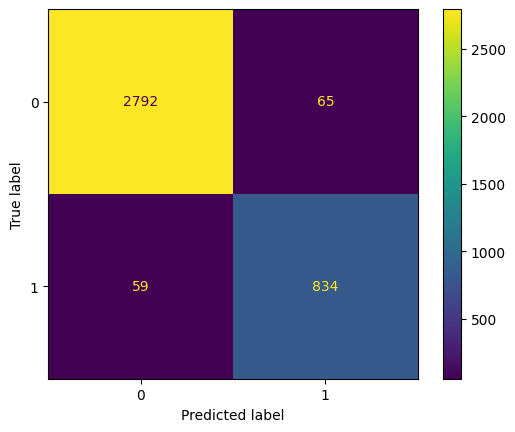

In [76]:
best_model = refined_xgb_cv.best_estimator_
y_pred = best_model.predict(X_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=refined_xgb_cv.classes_)
disp.ax_.grid(False)
plt.show()

Next, we will check for feature importances.

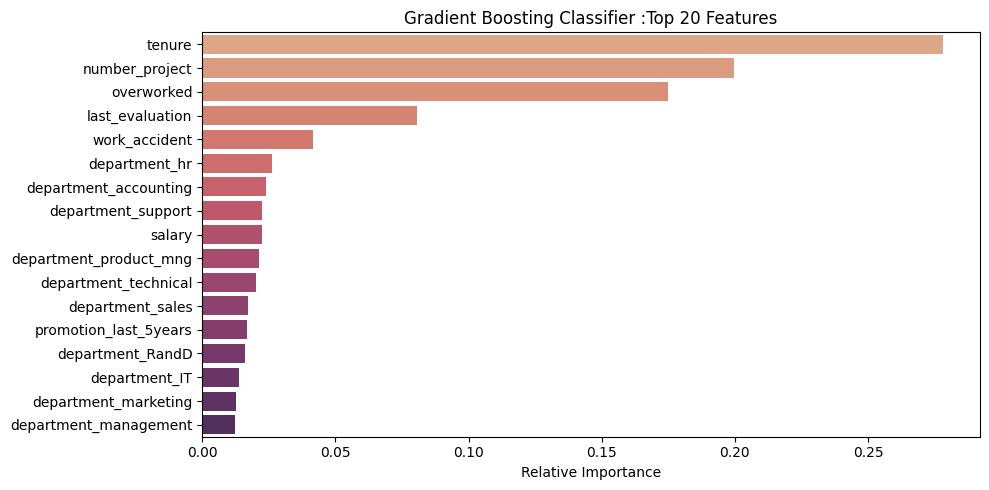

In [77]:
# 1. Extract feature names and importances from the best‐found model
best_model = refined_xgb_cv.best_estimator_
feats = best_model.feature_importances_  
names = X_train.columns.tolist()         

# 2. Build a DataFrame and sort by importance
fi_df = pd.DataFrame({'feature': names, 'importance': feats})
fi_df = fi_df.sort_values(by='importance', ascending=False).head(20)  


fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    x='importance',
    y='feature',
    data=fi_df,
    hue='feature',        
    palette='flare',
    legend=False,         
    ax=ax
)
ax.set_title('Gradient Boosting Classifier :Top 20 Features')
ax.set_xlabel('Relative Importance')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

The feature importance plot from a Gradient Boosting Classifier shows that `tenure`, `number_project`, and `overworked` are the top three most influential features in the model, with `tenure` contributing the most by a notable margin. These features are followed by `last_evaluation` and `work_accident`, though their contributions are significantly lower. This indicates that the length of time an employee has stayed with the company, how many projects they handle, and whether they are overworked play a crucial role in predicting the target outcome.

Although the Gradient Boosting Classifier is chosen for prediction, the feature importances from the Random Forest Classifier are also worth examining, as the model still performs very well.

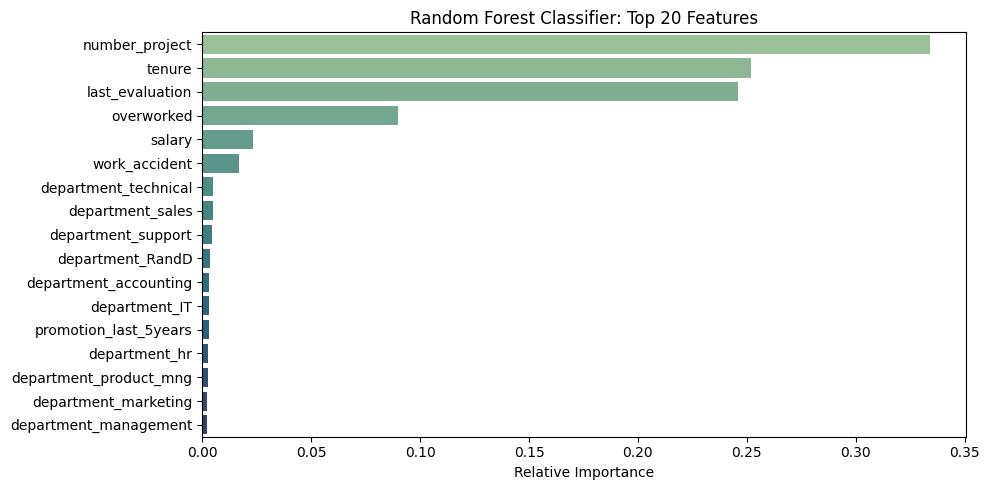

In [78]:
# 1. Extract feature names and importances from the best‐found model
best_model = refined_rf_cv.best_estimator_
feats = best_model.feature_importances_ 
names = X_train.columns.tolist()         

# 2. Build a DataFrame and sort by importance
fi_df = pd.DataFrame({'feature': names, 'importance': feats})
fi_df = fi_df.sort_values(by='importance', ascending=False).head(20)  


fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    x='importance',
    y='feature',
    data=fi_df,
    hue='feature',       
    palette='crest',
    legend=False,         
    ax=ax
)
ax.set_title('Random Forest Classifier: Top 20 Features')
ax.set_xlabel('Relative Importance')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

The feature importance plot from the Random Forest Classifier shows that `number_project`, `tenure`, and `last_evaluation` are the top three features, with `number_project` being the most influential by a clear margin. These are followed by `overworked` and `salary`, though their impact is much smaller. This suggests that the number of projects, length of service, and recent evaluations are key factors in predicting whether an employee will leave. In comparison, a Gradient Boosting Classifier gives slightly more weight to tenure, but both models rank workload and tenure-related factors above other attributes like department or past promotions.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Gradient Boosting Classifier model demonstrates excellent performance on the test data with high precision (0.93), recall (0.93), F1 score (0.93), accuracy (96.7%), and AUC (0.96), indicating strong predictive capability for employee leave classification.



### Conclusion, Recommendations

The models and their feature importances suggest that employees with longer `tenure` tend to stay, while those who are overworked (based on `number_project` and `average_monthly_hours`) are more likely to `leave`.

To help retain employees, the following recommendations could be presented to stakeholders:
1. Investigate why employees with four-year tenures report such low satisfaction.
2. Set a limit on the number of projects an employee can handle.
3. Either reward employees for working longer hours or avoid expecting them to do so.
4. Make sure employees are aware of the company’s overtime pay policies. If expectations around workload and time off are unclear, communicate them more explicitly.
5. Facilitate company-wide and team-level discussions to better understand and improve the work culture, both generally and in specific teams.
6. Avoid reserving high evaluation scores only for those working over 200 hours per month. Instead, consider a more balanced system that rewards effort and contribution fairly.